### Import libraries

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [205]:
# show the number of rows and columns in dataset
df.shape

(11162, 15)

In [206]:
# show the columns types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   balance    11162 non-null  int64 
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   contact    11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  deposit    11162 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [207]:
# check missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

In [208]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [209]:
# Make Function that make Data frame to show columns types ,nulls and unique values
from preprocessing import columns_info
columns_info(df)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
Data types,int64,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object
Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Unique Values,76,12,3,4,3805,2,2,3,31,12,1428,36,472,34,2


In [210]:
# Make function that Transfer the object columns types to category columns types
from preprocessing import object_to_category
df = object_to_category(df)

In [211]:
columns_info(df)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
Data types,int64,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category
Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Unique Values,76,12,3,4,3805,2,2,3,31,12,1428,36,472,34,2


In [212]:
# Show statistical information about every column
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Data Analysis

#### A. Outlier Detection Graphs

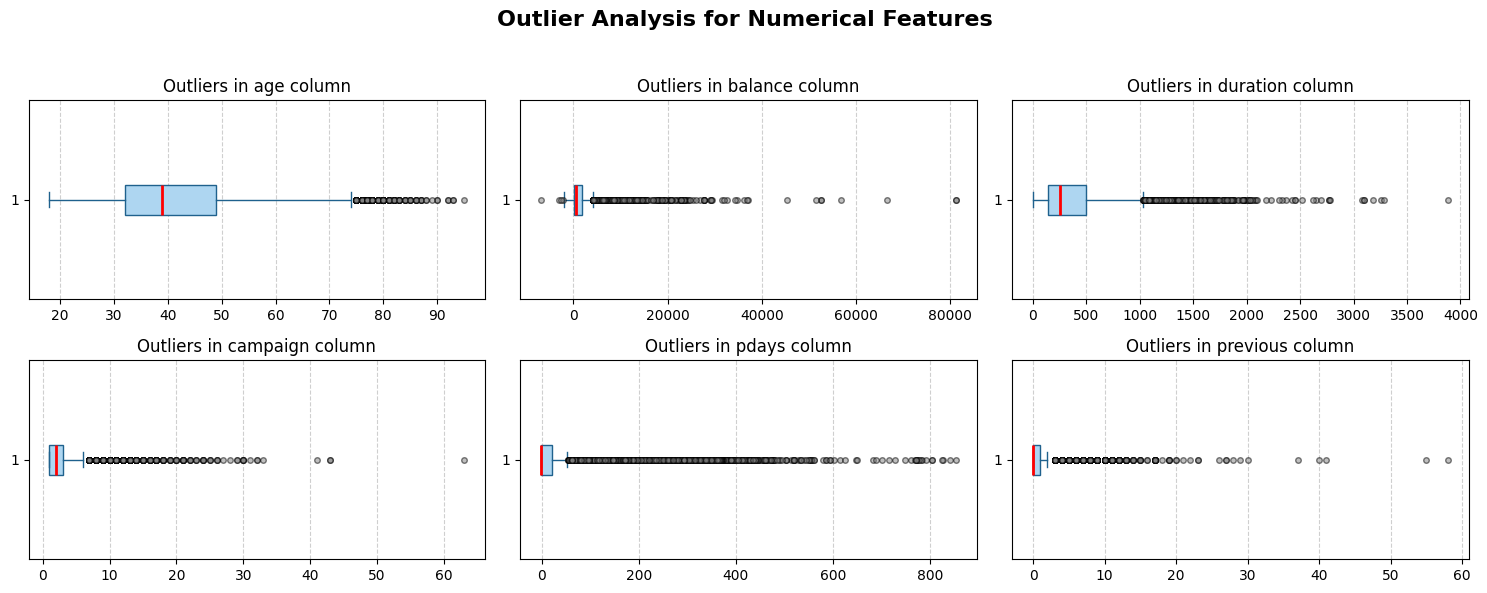

In [213]:
# get the outliers of all numeric columns
numeric_col =['age','balance' , 'duration' , 'campaign' , 'pdays' , 'previous']
plt.figure(figsize=(15,6))
for idx , col in enumerate(numeric_col):
    plt.subplot(2,3, idx+1)
    plt.boxplot(df[col] ,         
        vert=False,
        patch_artist=True,
        boxprops=dict(facecolor="#AED6F1", edgecolor="#1F618D"),
        medianprops=dict(color="red", linewidth=2),
        whiskerprops=dict(color="#1F618D"),
        capprops=dict(color="#1F618D"),
        flierprops=dict(marker='o', markerfacecolor='gray', markersize=4, alpha=0.5) )
    plt.title(f"Outliers in {col} column")
    plt.grid(axis="x", linestyle="--", alpha=0.6)
 


plt.suptitle("Outlier Analysis for Numerical Features", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### B. Histogram Distribution Graphs

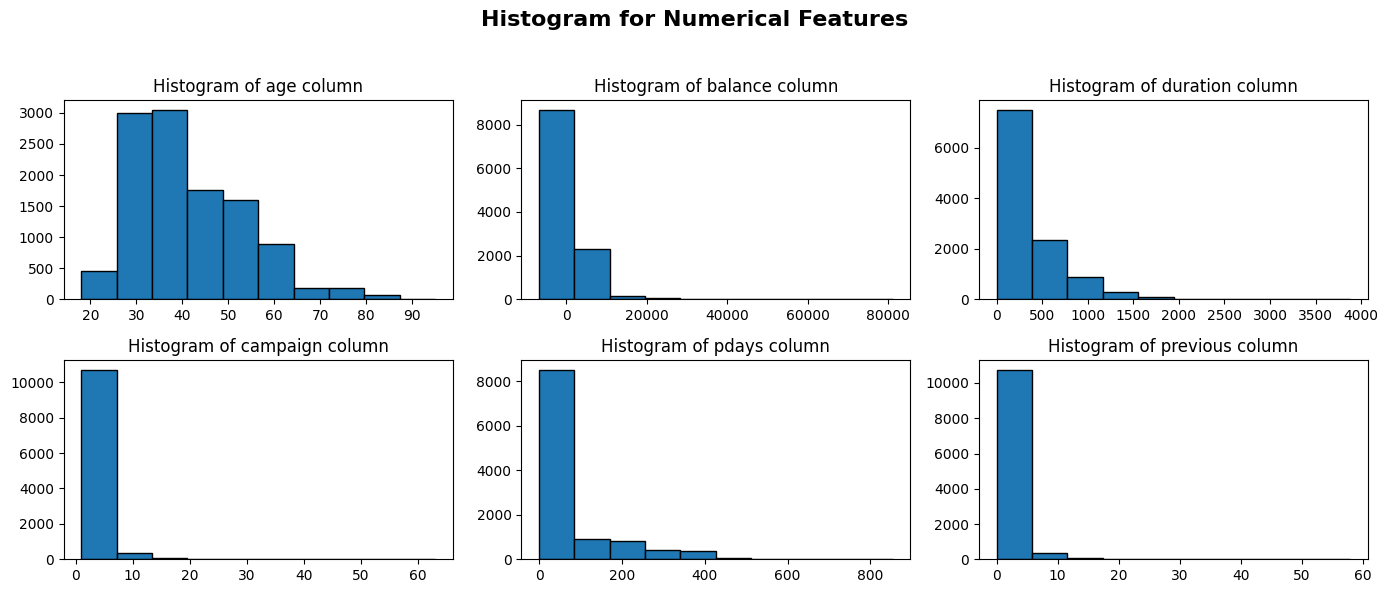

In [214]:
plt.figure(figsize=(14,6))
for idx , col in enumerate(numeric_col):
    plt.subplot(2,3,idx+1)
    plt.hist(x= col , data=df , edgecolor="black")
    plt.title(f"Histogram of {col} column")
    
plt.suptitle("Histogram for Numerical Features", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

From the previous Distribution we get that all mumeric columns are right skewed

#### C. KDE Distribution Graphs

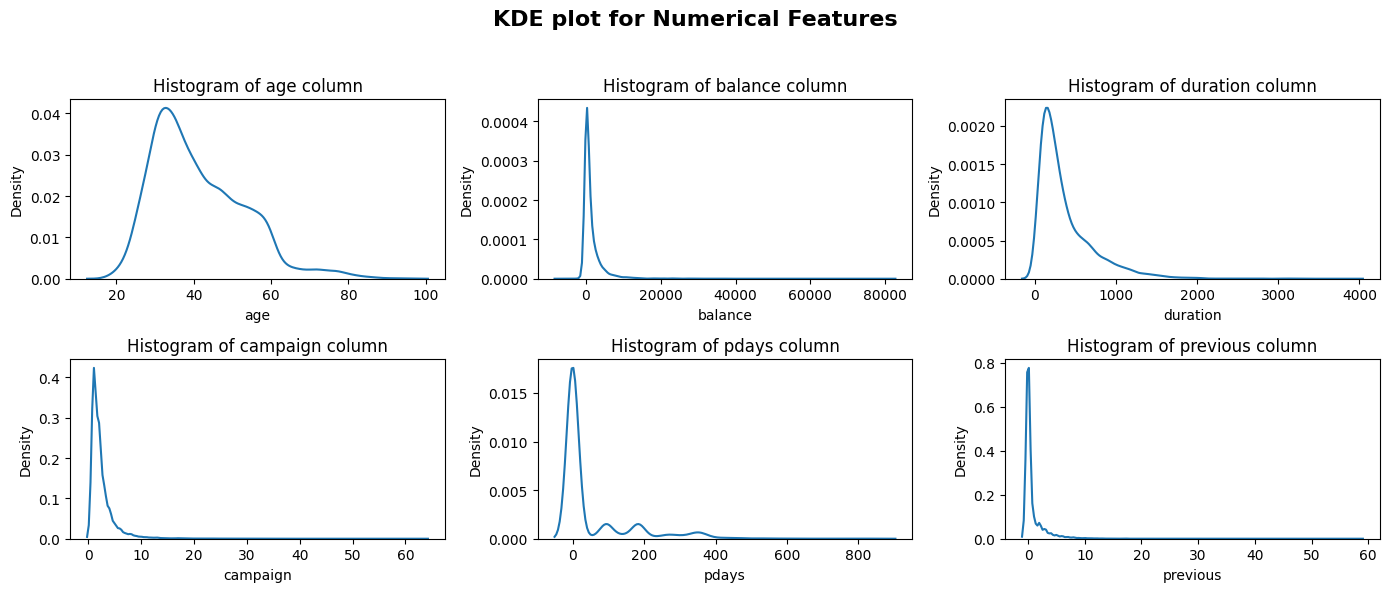

In [215]:
#show the Histograms distributin of the same columns
plt.figure(figsize=(14,6))
for idx , col in enumerate(numeric_col):
    plt.subplot(2,3,idx+1)
    sns.kdeplot(df[col])
    plt.title(f"Histogram of {col} column")
    
plt.suptitle("KDE plot for Numerical Features", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### D. Categorical columns Graphs

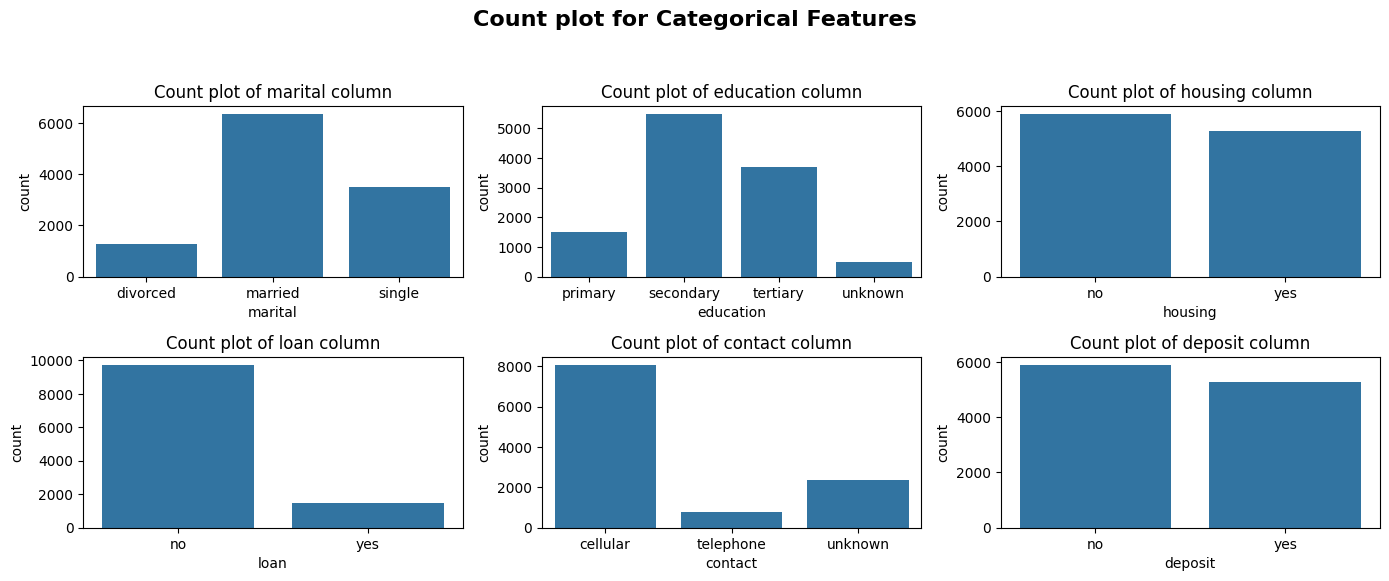

In [216]:
cat_cols = ['marital' , 'education' , 'housing' , 'loan' ,'contact' , 'deposit']
plt.figure(figsize=(14,8))
for idx , col in enumerate(cat_cols):
    plt.subplot(3,3,idx+1)
    sns.countplot(x=col, data=df)
    plt.title(f"Count plot of {col} column")

plt.suptitle("Count plot for Categorical Features", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()    

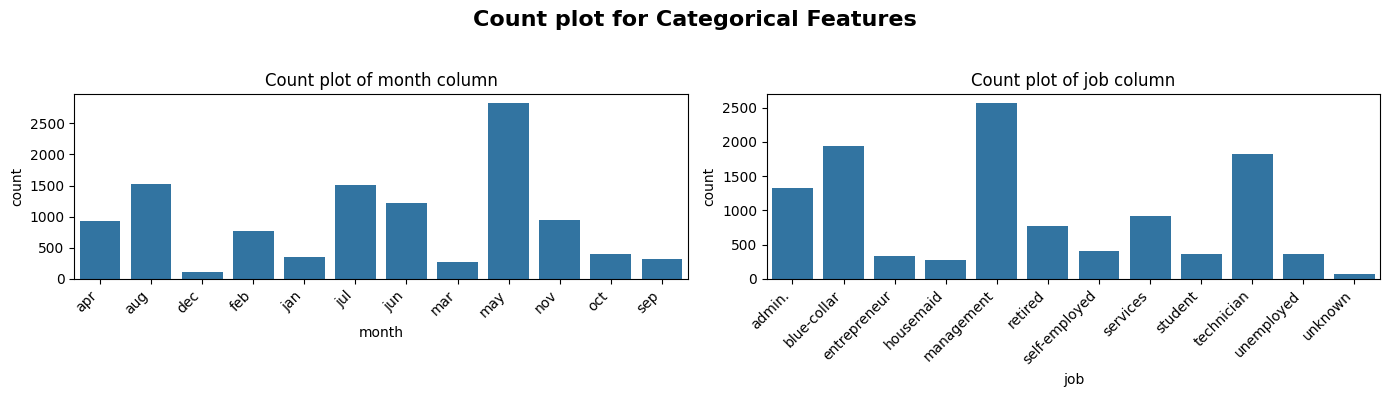

In [217]:
second_cat_cols = ['month' , 'job']
plt.figure(figsize=(14,4))
for idx , col in enumerate(second_cat_cols):
    plt.subplot(1,2,idx+1)
    sns.countplot( x = col , data=df)
    plt.title(f"Count plot of {col} column")
    plt.xticks(rotation=45, ha='right')


plt.suptitle("Count plot for Categorical Features", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### E. Bar plot

C:\Users\soker\AppData\Local\Temp\ipykernel_21024\3814750307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="job", y="age", data=df ,  estimator='mean', palette='Blues')


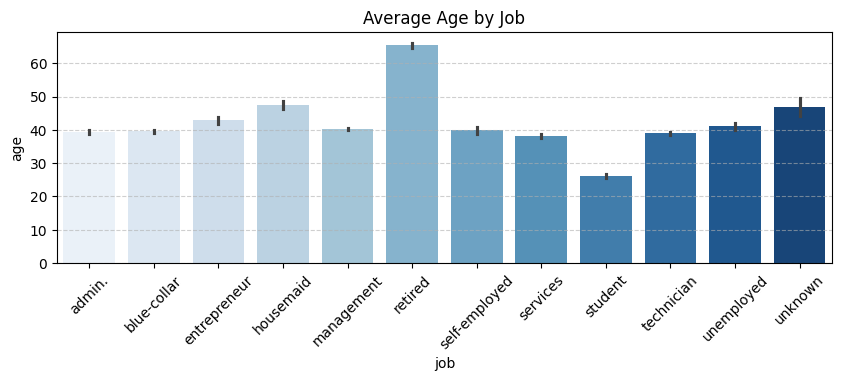

In [218]:
#show the relationship between categorical and numerical columns
plt.figure(figsize=(10, 3))
sns.barplot(x="job", y="age", data=df ,  estimator='mean', palette='Blues')
plt.title("Average Age by Job")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Normalization

In [219]:
from sklearn.preprocessing import RobustScaler

scaling_cols = ['pdays', 'balance', 'duration']
scaler = RobustScaler()

df[scaling_cols] = scaler.fit_transform(df[scaling_cols])

#### Encoding

In [ ]:
# for binary Encoding
binary_cols = ['housing', 'loan', 'deposit']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0}).astype(int)

In [ ]:
# for ordinal encoding (order)
from sklearn.preprocessing import OrdinalEncoder
education_order = [['unknown','primary', 'secondary', 'tertiary']]  
month_order = [['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]

oe_education = OrdinalEncoder(categories=education_order)
oe_month = OrdinalEncoder(categories=month_order)

df['education'] = oe_education.fit_transform(df[['education']]).astype(int)
df['month'] = oe_month.fit_transform(df[['month']]).astype(int)


In [226]:
# for ordinal encoding
from sklearn.preprocessing import OneHotEncoder

nominal_cols = ['job', 'marital', 'contact']

ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_nominal = ohe.fit_transform(df[nominal_cols])

encoded_nominal_df = pd.DataFrame(encoded_nominal,columns=ohe.get_feature_names_out(nominal_cols),index=df.index)

df = pd.concat([df.drop(columns=nominal_cols), encoded_nominal_df], axis=1)


In [227]:
df.head()

,age,education,balance,housing,loan,day,month,duration,campaign,pdays,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown
0,59,2.0,1.130517,1,0,5,4.0,2.198324,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,56,2.0,-0.318411,0,0,5,4.0,3.385475,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,41,2.0,0.453972,1,0,5,4.0,3.167598,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,55,2.0,1.214376,1,0,5,4.0,0.905028,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,54,3.0,-0.230769,0,0,5,4.0,1.167598,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
